Задание 1
* Визуализировать набор точек
* Найти коэффициенты регрессии  w0,w1  по шагам, как в уроке
* Посчитать предсказание в виде  y^=w0+w1x  и визуализировать его вместе с точками x_hw и y_hw

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

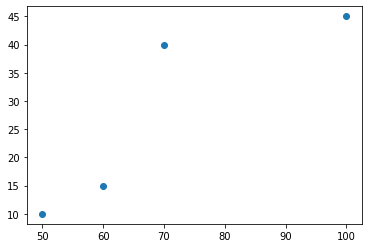

In [3]:
fig, ax = plt.subplots()

ax.scatter(x_hw, y_hw)
plt.show()

In [4]:
y_hw_array = np.array(y_hw)

In [5]:
x_hw_array = np.array([[1,x] for x in x_hw])

In [6]:
x_hw_array

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [7]:
w = np.linalg.inv((x_hw_array.T).dot(x_hw_array)).dot(x_hw_array.T).dot(y_hw_array)

In [8]:
w

array([-22.5       ,   0.71428571])

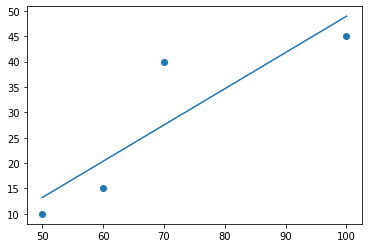

In [9]:
X = np.linspace(x_hw[0], x_hw[-1], num=100)
Y = w[0] + w[1]*X

fig, ax = plt.subplots()

ax.scatter(x_hw, y_hw)
ax.plot(X, Y)
plt.show()

In [10]:
Y

array([13.21428571, 13.57503608, 13.93578644, 14.2965368 , 14.65728716,
       15.01803752, 15.37878788, 15.73953824, 16.1002886 , 16.46103896,
       16.82178932, 17.18253968, 17.54329004, 17.9040404 , 18.26479076,
       18.62554113, 18.98629149, 19.34704185, 19.70779221, 20.06854257,
       20.42929293, 20.79004329, 21.15079365, 21.51154401, 21.87229437,
       22.23304473, 22.59379509, 22.95454545, 23.31529582, 23.67604618,
       24.03679654, 24.3975469 , 24.75829726, 25.11904762, 25.47979798,
       25.84054834, 26.2012987 , 26.56204906, 26.92279942, 27.28354978,
       27.64430014, 28.00505051, 28.36580087, 28.72655123, 29.08730159,
       29.44805195, 29.80880231, 30.16955267, 30.53030303, 30.89105339,
       31.25180375, 31.61255411, 31.97330447, 32.33405483, 32.69480519,
       33.05555556, 33.41630592, 33.77705628, 34.13780664, 34.498557  ,
       34.85930736, 35.22005772, 35.58080808, 35.94155844, 36.3023088 ,
       36.66305916, 37.02380952, 37.38455988, 37.74531025, 38.10

Задание 3 (Я не знаю где второе)
* Для каждой точки из y_true постройте величину ошибки  e=y−y^  – это называется остатки регрессии
* Возведите ошибки в квадрат  e2 
* Постройте график ошибок – зависимость  e2  от  e

In [11]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

In [12]:
e = y_true_ - y_pred_
e_sqr = e ** 2

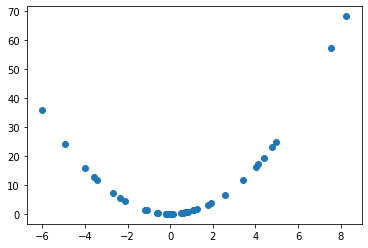

In [13]:
plt.scatter(e, e_sqr)
plt.show()

Задача 4  
    Даны точки  x  и значения в этих точках  y . Нормализуйте  y  с помощью z-score и постройте график зависимости нормализованных значений от  x . Для графика используйте .scatter(x,y_tansformed)


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)

In [15]:
transformed_data = StandardScaler().fit_transform(y.reshape(-1,1))

In [16]:
transformed_data

array([[-1.2465616 ],
       [-0.57274455],
       [-0.23583598],
       [-0.9096531 ],
       [ 1.7856153 ],
       [ 0.10107257],
       [ 0.10107257],
       [-0.9096531 ],
       [ 0.10107257],
       [ 1.7856153 ]], dtype=float32)

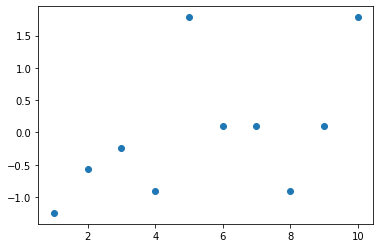

In [17]:
plt.scatter(x, transformed_data)
plt.show()

Задание 5   
    Задание простого уровня Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* Возьмите все степени от 1 до 10 по порядку, без пропусков.
* Найдите степень полинома, где будет лучший r2-score
* Напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор   
    Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [18]:
data = pd.read_csv('non_linear.csv', sep=',')

Степень полинома 1 Ошибка 0.519


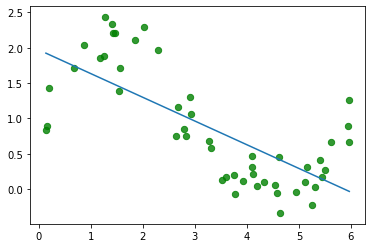

Степень полинома 2 Ошибка 0.533


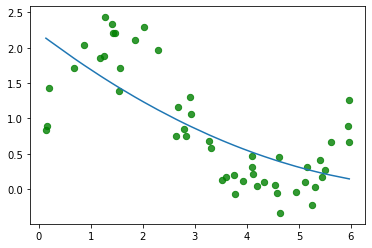

Степень полинома 3 Ошибка 0.888


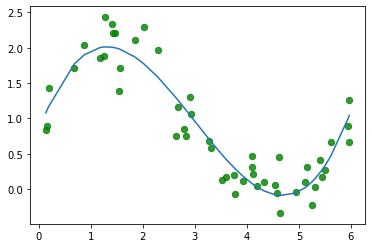

Степень полинома 4 Ошибка 0.895


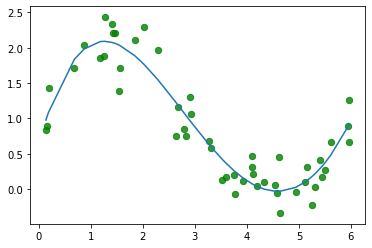

Степень полинома 5 Ошибка 0.896


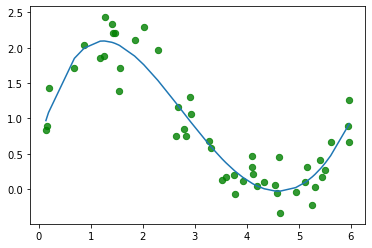

Степень полинома 6 Ошибка 0.899


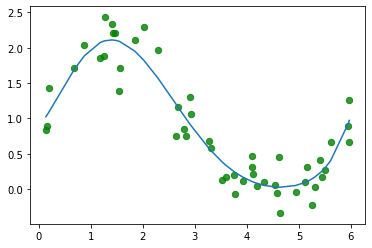

Степень полинома 7 Ошибка 0.900


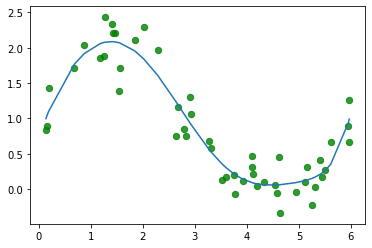

Степень полинома 8 Ошибка 0.909


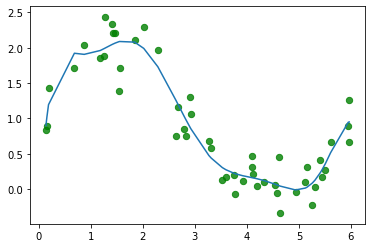

Степень полинома 9 Ошибка 0.909


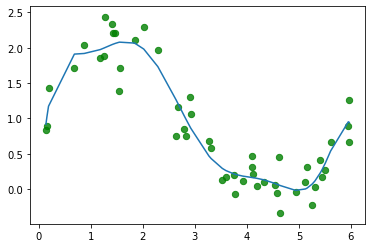

Степень полинома 10 Ошибка 0.909


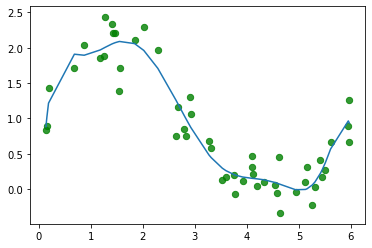

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = r2_score(data['y_train'], y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)
    
for degree in range(1, 11):
    fig, ax = plt.subplots()
    train_polynomial(degree, data)
    plt.show()

Последние степени самые лучшие

Задание среднего уровня Напишите класс для обучения модели, который содержит:
* Функцию .fit(X, y) , которая принимает на вход массив фичей X, массив таргетов y и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля Постановка ML задачи линейной регрессии
* Функцию .predict(X), которая по массиву фичей X возвращает массив предсказаний y

In [20]:
class CustomLinearReg:

    def __init__(self):

        self.w = None 

    

    def fit(self, X, y):

        X = np.insert(X, 0, 1, axis=1)

        self.w = np.linalg.inv(  

            X.T.dot(X)

        ).dot(

            X.T

        ).dot(

            y

        )
        
        


    def predict(self, X):

        Y_model = self.w[1][0]*X + self.w[0][0]

        return Y_model

In [22]:
reg = CustomLinearReg()

X = data.x_train.values.reshape(-1, 1)

y = data.y_train.values.reshape(-1, 1)

reg.fit(X,y)

y_pred = reg.predict(X)

print(r2_score(y, y_pred))

0.5194693682784115


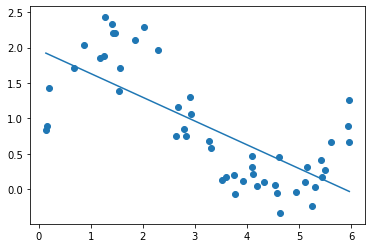

In [23]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, y_pred)
plt.show()

Чет я не совсем понимаю как это работает

Задание высокого уровня:
1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции train_test_split из библиотеки sklearn
2. обучите модель только на train датасете
3. постройте предсказания valid датасете
4. Посчитайте r2 score на валидационном сете   
    После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?   
    
    Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [25]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(boston_dataset.data, boston_dataset.target, test_size=0.2, random_state=10)

In [28]:
train = LinearRegression().fit(X = X_train, y = y_train)

In [29]:
predicted = train.predict(X_valid)

In [30]:
error = r2_score(y_valid, predicted)
error

0.670933983911564

In [31]:
scaler = StandardScaler()

scaler_y = StandardScaler()

X_train_z, X_valid_z = scaler.fit_transform(X_train), scaler.transform(X_valid)

y_train_z, y_valid_z = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel(), scaler_y.transform(y_valid.reshape(-1,1)).ravel()

In [32]:
train2 = LinearRegression().fit(X = X_train_z, y = y_train_z)

In [33]:
predicted2 = train2.predict(X_valid_z)

In [34]:
error2 = r2_score(y_valid_z, predicted2)
error2

0.6709339839115631

Никак